In [1]:
from IPython.display import Image

In [2]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [3]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

import pandas as pd

import numpy as np
import random

# Сылка

[Лекция](https://github.com/bdemeshev/coursera_metrics/tree/master/lec_01)

**Модель** - формула для объясняемой переменной

**RSS** – остаточная сумма квадратов (сумма квадратов остатков) – Residual Sum of Squares $\Sigma (y_i - \hat y_i) ^2= \Sigma \hat \varepsilon_i^2$ - проекция вектора $y$ на единичный вектор $ \hat y_i$

**TSS** - общая сумма квадратов Total Sum of Squares $\Sigma (y_i - \overline y) ^2$ -показывает насколько реальные значения перменной лежат далеко от среднего значения - проекция вектора $y$ на единичный вектор

**ESS** - объясненная сумма квадратов EXplained Sum of Squares  $\Sigma (\hat y_i - \overline y) ^2$ -показывает насколько прогназируемые значения перменной лежат далеко от среднего значения  - проекция вектора $ \hat y_i$ на единичный вектор

$\frac {ESS}{ TSS} = R^2= cos\phi^2 \in  [0, 1]$

TSS = RSS +  ESS по теореме пифагора 

$R^2$ 
- это доля объяснённого разброса в общем разбросе
- квадрат выборочного коэффициента корреляции

Регрессионая прямая проходит через геометрический центр (через $\hat x$ и  через $\hat y$), поэтому выбросы смещают оценки МНК, так как цент будет смещен относительного всего облака точек

In [5]:
data = pd.read_csv('C:\\Users\\Boyarkin.IS1\\Desktop\\DS\\Private\\education_courses\\Основы Статистики [Карпов]\\data\\mtcars.csv', index_col=0)
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# Регересисонная прямая Объем двигателя пути и веса
# disp: Объем двигателя и  wt: 	вес

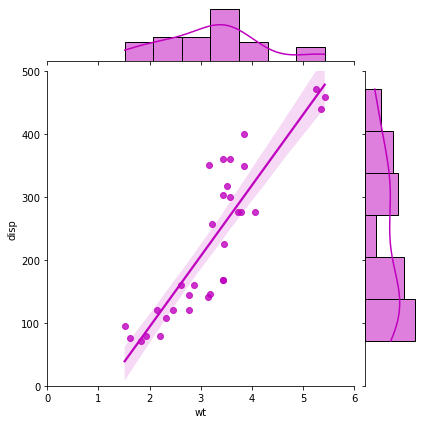

In [7]:
sns.jointplot(y='disp',
              x='wt', 
              data=data,
              kind='reg',
              color='m' ,
              xlim=(0,6),
                ylim=(0,500)
             )

In [8]:
import statsmodels.formula.api as smf

# линейная регрессия
model = smf.ols('disp ~ wt',data=data)
fitted = model.fit()

# коеффиценты
fitted.params

# выкладка по модели
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   disp   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.22e-11
Time:                        17:57:08   Log-Likelihood:                -174.27
No. Observations:                  32   AIC:                             352.5
Df Residuals:                      30   BIC:                             355.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -131.1484     35.717     -3.672      0.0

In [9]:
# чтобы извлечь данные из таблички выше можно выполнить следующее преобразование
# каждый кусок - это датафрейм

for i in range(1):
    print(pd.read_html(fitted.summary().tables[i].as_html(),header=0,index_col=0)[0].reset_index())
    print( '--------------------------------------------------------------------------------------')

      Dep. Variable:              disp           R-squared:         0.789
0             Model:               OLS      Adj. R-squared:  7.810000e-01
1            Method:     Least Squares         F-statistic:  1.118000e+02
2              Date:  Mon, 16 Aug 2021  Prob (F-statistic):  1.220000e-11
3              Time:          17:57:08      Log-Likelihood: -1.742700e+02
4  No. Observations:                32                 AIC:  3.525000e+02
5      Df Residuals:                30                 BIC:  3.555000e+02
6          Df Model:                 1                  NaN           NaN
7   Covariance Type:         nonrobust                  NaN           NaN
--------------------------------------------------------------------------------------


In [10]:
#остатки
data['resid']= fitted.resid
# предсказанные
data['pred'] = fitted.predict()

In [11]:
RSS = sum((data['disp'] - data['pred'])**2)
TSS = sum((data['disp'] - data['disp'].mean())**2)
ESS= sum((data['pred'] - data['disp'].mean())**2)

In [12]:
# коэффициент детерминации через ESS и TSS
ESS/TSS

0.788508341978377

<AxesSubplot:>

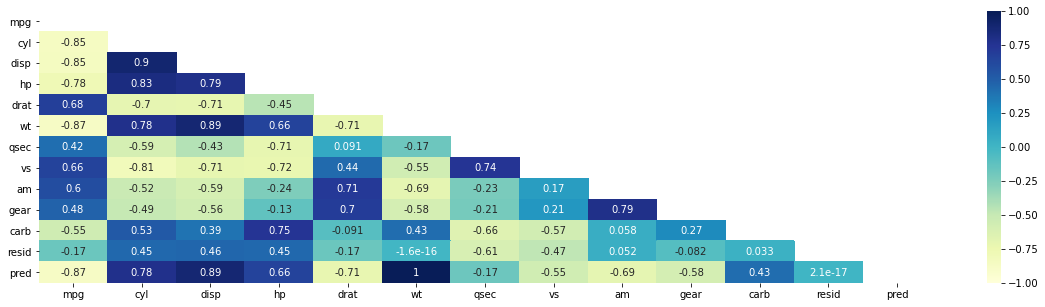

In [13]:
# корреляция между переменными
f, ax = plt.subplots(1, 1 , figsize = (20, 5))
matrix = np.triu(data.corr())
correlation = data.corr(method='pearson')
sns.heatmap(correlation,annot = True, vmin=-1, vmax=1, center= 0, cmap= 'YlGnBu', mask=matrix)

In [14]:
# коэффициент дитерминации через выборочную корреляцию переменных
data['disp'].corr(data['pred'])**2

0.7885083419783769

Чтобы предсказать новые данные

In [15]:
# сгенерим новые данные
x1n = np.linspace(20.5, 25, 10)
Xnew = pd.DataFrame(x1n, columns=['wt'])
# predict out of sample
ynewpred =  fitted.predict(Xnew) 
print(ynewpred)

0    2174.653421
1    2230.892491
2    2287.131560
3    2343.370629
4    2399.609698
5    2455.848767
6    2512.087837
7    2568.326906
8    2624.565975
9    2680.805044
dtype: float64
